In [1]:
import pandas as pd
import numpy as np
import copy , math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

###### Sigmoid Function declared

In [2]:
def sigmoid(z): 
    g = 1.0 / (1.0 + np.exp(-z))    
    return g

#### Calling Files


In [3]:
data1 = pd.read_csv('train_data.csv') #training data
data2 = pd.read_csv('test_data.csv') #test data

In [4]:
data1

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


In [5]:
data1 = data1.drop(['Unnamed: 0', 'PassengerId'], axis=1)

In [6]:
data1 # free of unnamed column and passenger Id as it has no use in regression.

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


In [7]:
Y_train= data1['Survived'].to_numpy()
X_train= data1.iloc[:,1:].to_numpy()

Y_train.shape

(792,)

In [8]:
X_train.shape

(792, 14)

##### W and b will be initialized as all the values inthe data set are regularized between 0 and 1 so no need for regularization

In [9]:
w = np.zeros_like(X_train[0])
b = 0
print(w.shape)
w

(14,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Compute Cost

In [10]:
def compute_cost_logistic(X ,y ,w, b):
        
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost

##### Compute Gradient Function

In [11]:
#compute the derivative of the cost function

#def compute_gradient_logistic_reg(X , y , w , b , lambda_=1): For regularization
def compute_gradient_logistic(X , y , w , b ):
    
    
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b) #directlly Z andar likh diya
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    #for regularization uncomment
    # for j in range(n):
    #     dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
        
    return dj_db , dj_dw
    

#### Compute Gradient Descent 

In [12]:
#update the W , B value with the learning rate @ 
def gradient_descent(X, y, w_in, b_in, compute_cost_logistic ,compute_gradient_logistic , alpha, num_iters): 
 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b) # CALLED COMPUTE GRADIENT FUNCTION

        # Update of Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        #save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Printing cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")       
        
    return w, b, J_history

In [13]:

#gradient descent settings/tunings
iterations = 10000
alpha = 0.001

w,b, J_history = gradient_descent(X_train ,Y_train, w, b, compute_cost_logistic, compute_gradient_logistic, alpha, iterations)

Iteration    0: Cost 0.6930287806444644   
Iteration 1000: Cost 0.6244041585970741   
Iteration 2000: Cost 0.5960698306872261   
Iteration 3000: Cost 0.5779195790967935   
Iteration 4000: Cost 0.5637393162543767   
Iteration 5000: Cost 0.5519181877554259   
Iteration 6000: Cost 0.541850328742626   
Iteration 7000: Cost 0.5331948670212995   
Iteration 8000: Cost 0.5257074288537086   
Iteration 9000: Cost 0.5191956397567066   


#### Graphical Representation

Text(0.5, 1.0, 'Loss vs. No. of ITR')

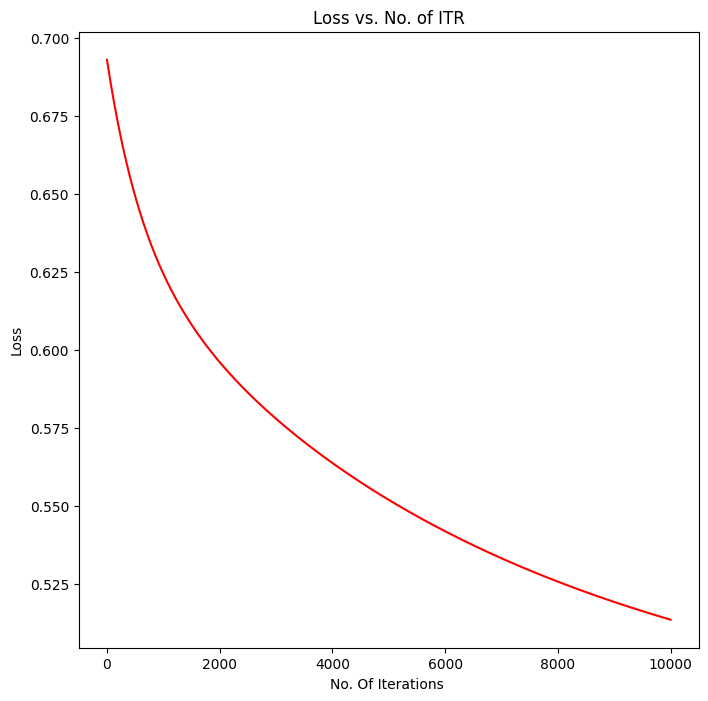

In [24]:
y_data = J_history
x_data = np.arange(0,10000,1)
fig = plt.figure(1 , figsize = (8,8))
plt.plot(x_data , y_data , color = 'red')
plt.xlabel('No. Of Iterations ')
plt.ylabel('Loss')
plt.title('Loss vs. No. of ITR')

#### Prediction

In [27]:
data2 = data2.drop(['Unnamed: 0', 'PassengerId'], axis=1)
data2

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,1,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,0,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,1,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [29]:

Y_test= data2['Survived'].to_numpy()
X_test= data2.iloc[:,1:].to_numpy()

Y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each row
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            z_wb_ij = X[i , j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        
        # the prediction for this example
        f_wb = sigmoid(z_wb)
        # Apply the threshold
        p[i] = 0
        if (f_wb >= 0.5):
            p[i] = 1
        else: p[i] = 0
        
    return p

In [35]:
#showing results of the logistic regression

pred = predict(X_test , w , b) 
#Representation
data2.copy()
data2["predicted"] = pred
data2

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3,predicted
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1,0.0
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1,1.0
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0,0.0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1,0.0
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1,0.0
96,1,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1,1.0
97,0,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1,1.0
98,1,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0,0.0


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test , pred)
cm

array([[56,  8],
       [20, 16]], dtype=int64)

Text(95.72222222222221, 0.5, 'Real_Val')

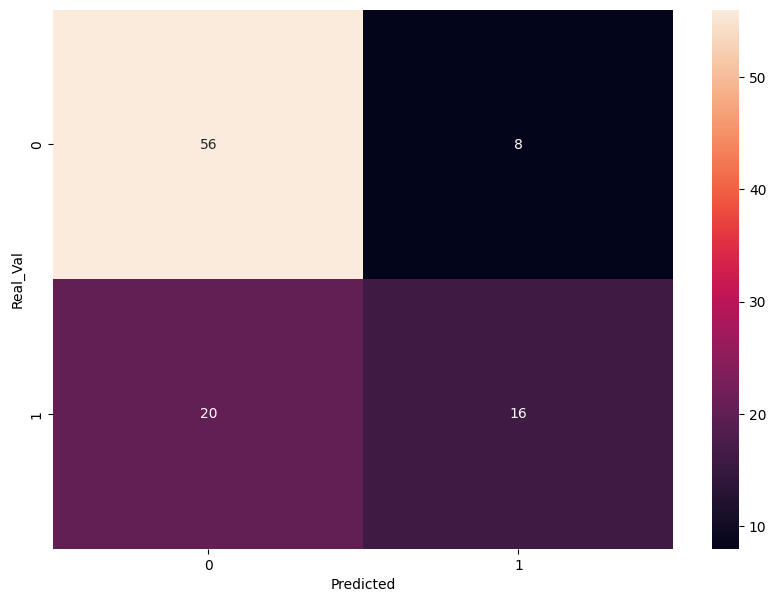

In [43]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Real_Val')

###### Accuracy = 72%

In [44]:
# ~btwn 70 - 90 % accuracy is acceptable however model should be best optimised to give maximum accuracy